In [2]:
import json
import pprint
import pandas as pd
import io
import yaml
import pylab
!pip install numpy==1.16.1
import numpy as np
import os
import glob

In [3]:

'''import sys
reload(sys)
sys.setdefaultencoding('utf-8')'''

'''def _decode_dict(data):
    rv = {}
    for key, value in data.iteritems():
        if isinstance(key, unicode):
            key = key.encode('utf-8')
        if isinstance(value, unicode):
            value = value.encode('utf-8')
        elif isinstance(value, list):
            value = _decode_list(value)
        elif isinstance(value, dict):
            value = _decode_dict(value)
        rv[key] = value
    return rv
def _decode_list(data):
    rv = []
    for item in data:
        if isinstance(item, unicode):
            item = item.encode('utf-8')
        elif isinstance(item, list):
            item = _decode_list(item)
        elif isinstance(item, dict):
            item = _decode_dict(item)
        rv.append(item)
    return rv'''

#def parser(file_path):
#    with io.open(file_path, encoding='utf-8') as f:
#        #io.open(f, encoding='utf-8-sig')
#        #raw_data = yaml.safe_load(f)
#        raw_data = json.load(f, encoding ='utf-8')
#        #raw_data = json.load(f, object_hook=_decode_dict)
#    return raw_data

####### Parsing function #######
def parser(file_path, mp4_file_path):
    with io.open(file_path, encoding='utf-8') as f:
        raw_data = json.load(f, encoding ='utf-8')
    # Get number of frames
    cap = cv2.VideoCapture(\".mp4\")
    property_id = int(cv2.CAP_PROP_FRAME_COUNT)
    nr_frames = int(cv2.VideoCapture.get(cap, property_id))
    columns = ['file_id', 'nr_frame', 'frame_id', 'sound_emotion']
       df = pd.DataFrame(columns=columns)
    info = {}
    for data in raw_data['shot_infos']:
        info['file_id'] = raw_data['common_info']['file_id']
        info['nr_frame'] = length
    for visual_info in data['visual_infos']:
        info['frame_id'] = visual_info['frame_id']
        if len(visual_info['persons']) > 0:
            info['sound_emotion'] = ''.join([key for key, value in visual_info['persons'][0]['person_info']['emotion'].items() if value != 0])
        df = df.append(info, ignore_index=True)
        info = {}
    return df

SyntaxError: unexpected character after line continuation character (<ipython-input-3-5aa3041439bb>, line 43)

In [ ]:
path_list = []
path_list = os.listdir('data')
print(path_list)
for x in path_list:
    if x[0]=='K':# 디렉터리인가?
        now_num = now_name.split('_')[-1]
        print(now_num)
        now_name = x

image_name = 'image_'+ now_num
print(image_name)
label_name = 'label_'+ now_num
print(label_name)
raw_data = parser('clip_226.json')
#raw_data = parser(now_name +'.json')


In [ ]:
columns = ['clip_id', 'nr_frame', 'script', 'script_start', 'script_end', 'sound_emotion', 'sound_arousal', 'sound_valence']
df = pd.DataFrame(columns=columns)
df

In [ ]:
info = {}

temp = set()

data = raw_data['data']

sound_flag = False
text_flag = False

for i in data:
    info[i] = {}
    info[i]['clip_id'] = raw_data['clip_id']
    info[i]['nr_frame'] = raw_data['nr_frame']
    info[i]['situation'] = raw_data['situation']

    for j in data[i].keys(): # j can be '1' or '2'
        if 'emotion' in data[i][j]:
            emotion = data[i][j]['emotion']
#             print(emotion)
            if 'sound' in emotion:
                info[i]['sound_arousal'] = emotion['sound']['arousal']
                info[i]['sound_emotion'] = emotion['sound']['emotion']
                info[i]['sound_valence'] = emotion['sound']['valence']
#                 sound_flag = True
        if 'text' in data[i][j]:
            info[i]['script'] = data[i][j]['text']['script']
            info[i]['script_start'] = data[i][j]['text']['script_start']
            info[i]['script_end'] = data[i][j]['text']['script_end']
#             text_flag = True

#         if sound_flag and text_flag:
#             break
#     if sound_flag and text_flag:
# #         break
pprint.pprint(info)

In [ ]:
for i in info.keys():
#     print(info[i])
    try:
        info[i]['frame'] = i
#         print(type(info[i]['frame']))
    except:
        print(type(i))
    df = df.append(info[i], ignore_index=True)
pprint.pprint(info)

In [ ]:
df

In [ ]:
df[df['sound_emotion'].notnull()]

In [ ]:
import numpy as np
npy_save = np.array(df)
npy_save

In [ ]:
np.save('clean_data.npy', npy_save)

In [ ]:
clean_data = np.load('clean_data.npy',allow_pickle=True)

In [ ]:
clean_data

# load and match frame

### get duration of mp4 file

In [9]:
import subprocess as sp
import json

def probe(filename):
    command = ["ffprobe",
            "-loglevel",  "quiet",
            "-print_format", "json",
             "-show_format",
             "-show_streams",
             filename
             ]

    pipe = sp.Popen(command, stdout=sp.PIPE, stderr=sp.STDOUT)
    out, err = pipe.communicate()
    return json.loads(out)

def duration(filename):
     #Video's duration in seconds, return a float number
    
    _json = probe(filename)

    if 'format' in _json:
        if 'duration' in _json['format']:
            return float(_json['format']['duration'])

    if 'streams' in _json:
        # commonly stream 0 is the video
        for s in _json['streams']:
            if 'duration' in s:
                return float(s['duration'])

    # if everything didn't happen,
    # we got here because no single 'return' in the above happen.
    raise Exception('I found no duration')

In [35]:
duration(filename='clip_226.mp4')

67.07

# After parsing

In [36]:

import os

# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
!pip install librosa
import librosa
# And the display module for visualization
import librosa.display

In [37]:
clean_data = np.load('clean_data.npy',allow_pickle=True)
print(clean_data.shape)
all_real_fr_num = clean_data.shape[0] #총개수
print(all_real_fr_num)
print(clean_data[0])
all_fr_num = clean_data[0][1] #써있는전체개수
print(all_fr_num)
start_fr_num = clean_data[0][8] #시작프레임
print(start_fr_num) 

(1870, 10)
1870
['226' '2010' nan nan nan nan nan nan '140'
 '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.']
2010
140


In [39]:

audio_path = '/Users/stella/dev/korean-audio-sentiment-analysis/preprocess/clip_226.mp4' #자동화
print(audio_path)
y, sr = librosa.load(audio_path)
#y, sr = librosa.load('clip_226.mp4')

/Users/stella/dev/korean-audio-sentiment-analysis/preprocess/clip_226.mp4


In [40]:
print(y.shape) 
y = y.tolist()

(1478894,)


In [41]:
print(sr) #sampling rate
sr_f = float(sr)

22050


In [42]:
t = np.array(list(range(0,1478894,1)))
t = t*(1/sr_f)
print(t)
print(t.shape)
t = t.tolist()

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 6.70698866e+01
 6.70699320e+01 6.70699773e+01]
(1478894,)


<function matplotlib.pyplot.show(*args, **kw)>

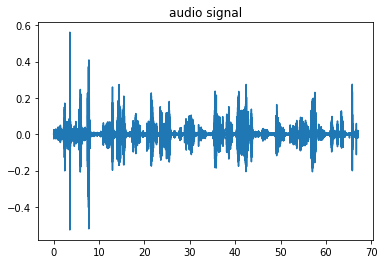

In [43]:

plt.plot(t,y)
# Put a descriptive title on the plot
plt.title('audio signal')
plt.show

In [44]:
import pandas as pd
frame_info_s =[]
frame_info_e =[]
bef_e = ''
label = []
check = 0
# frame_info : all_real_fr_num (#총개수)
# y : y.shape
#print(len(y))
#print(all_real_fr_num)
fract = len(y)/all_real_fr_num # 프레임수(이미지)에 대한 y 의 비율
print(fract)
for i in range(0, clean_data.shape[0]):
    now_e = clean_data[i][5]
    if(bef_e!=now_e): #앞과 다를때
        if(check==1):
            frame_info_e.append(round((float(clean_data[i][8])- float(start_fr_num) -1)*fract)) #번째 frame-> y 비율곱로 저장
            check = 0
        if(pd.notnull(now_e)): #nan 이 아니면서
            print(now_e)
            label.append(now_e)
            #print(i)
            frame_info_s.append(round((float(clean_data[i][8])- float(start_fr_num) -1)*fract)) #번째 frame-> y 비율곱로 저장
            bef_e = now_e
            check = 1
            #print((float(clean_data[i][8])- float(start_fr_num) -1))
if(check==1):
    frame_info_e.append(len(y))            
print(frame_info_s) #변화되기 직전 순간이 저장됨
print(len(frame_info_s))
print(len(frame_info_e))
#print(clean_data[180])
#print(clean_data[181])


790.8524064171123
hap
sad
neu
fear
sad
neu
hap
neu
sur
neu
hap
[142353, 385936, 576531, 633473, 710185, 944278, 1028108, 1097703, 1232148, 1266946, 1311233]
11
11


129701
182688
56943
56150
234094
72758
69596
134445
34798
44287
94903
(11,)
(128, 254)
(128, 254)


NameError: name 'image_name' is not defined

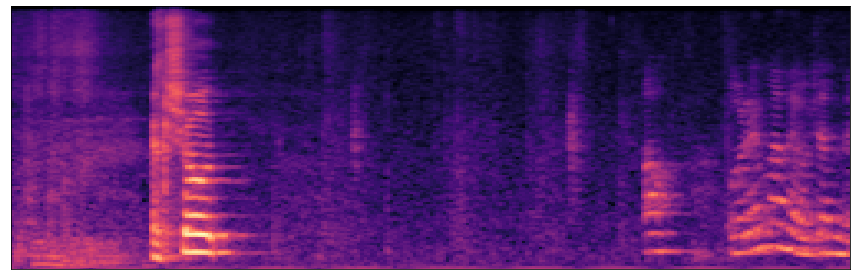

In [45]:
1478894
k= 0
new_arr = []
all_arr = []
for i in range(len(y)):
    if(i>=frame_info_s[k]):
        new_arr.append(y[i])
        if(i==frame_info_e[k]):
            all_arr.append(new_arr)
            print(len(new_arr))
            new_arr = []
            if(k<(len(frame_info_e)-1)):
                k = k+1
all_arr = np.asarray(all_arr) 
print(all_arr.shape)           
S = []
image = []
# Let's make and display a mel-scaled power (energy-squared) spectrogram
for i in range(len(all_arr)):
    
    S = librosa.feature.melspectrogram(np.asarray(all_arr[i]), sr=sr, n_mels=128)
    print(S.shape)
   
    
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.power_to_db(S, ref=np.max)
    print(log_S.shape)

    # Make a new figure
    plt.figure(figsize=(12,4))

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    librosa.display.specshow(log_S, sr=sr, x_axis='off', y_axis='off')

    # Put a descriptive title on the plot
    #plt.title('mel power spectrogram')

    # draw a color bar
    #plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()
    plt.savefig(image_name + ".png")

    S = []

In [48]:
# padding 등 고려 방법만 확정
# data loader -> 다른팀 형식 고려 안해도 되나
# 언어 기준으로 자른것 이므로 순간순간으로 하려면... 몇초간격으로 할것이냐
#

def create_tfrecord(dataset_list):
    print("Start converting...")
    options = tf.python_io.\
        TFRecordOptions(compression_type=tf.python_io.TFRecordCompressionType.GZIP)
    writer = tf.python_io.TFRecordWriter(\
        path="tfrecord/tfrecord_practice.tfrecords",
        options=options
    )
    for dataset in dataset_list:
        audio_file_path = dataset["audio_file_path"]
        script_file_path = dataset["script_file_path"]
        
        # 데이터셋을 미리 전처리하여 TFRecord로 저장
        audio = audio_process.get_audio(audio_file_path)
        
        script = get_script(script_file_path)
        script = script_pad(script)
        
        example = tf.train.Example(
            features=tf.train.Features(
                feature={
                    "audio": _bytes_feature(audio.tostring()),
                    "script": _bytes_feature(script.encode("utf-8")) # string 타입을 bytes 타입으로 변환
                }
            )
        )
        writer.write(example.SerializeToString())
    
    writer.close()
    print("Done...")

In [46]:
print(type(image))
print(len(image))
image = np.array(image)
print(type(label))
print(len(label))
print(label)
#확인중

<class 'list'>
0
<class 'list'>
11
['hap', 'sad', 'neu', 'fear', 'sad', 'neu', 'hap', 'neu', 'sur', 'neu', 'hap']


In [47]:
np.save('image_test.npy', image)